
# Anticipating Customer Behavior through Churn Prediction Modeling

## Introduction:
In the landscape of modern business, understanding and mitigating customer churn - the loss of customers to competitor offerings or disengagement - stands as a critical pursuit for sustainable growth. This project employs Python's powerful libraries such as NumPy, Pandas, Scikit-learn, Matplotlib, and Seaborn to delve into customer data analysis. Utilizing techniques encompassing LabelEncoder, StandardScaler, and Logistic Regression modeling, the objective is to craft predictive models capable of anticipating customer churn. By scrutinizing historical customer data, extracting meaningful features, and training a robust churn prediction model, this endeavor aims to equip businesses with actionable insights, empowering proactive strategies to retain valuable clientele.


In [1]:
import numpy as np
import pandas as pd
import sklearn
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

In [5]:
#Importing the churn data
df = pd.read_csv(r'C:\Users\Tette\OneDrive\Documents\churn.csv')
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [6]:
df.shape

(7043, 21)

In [8]:
df.columns.values

array(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges',
       'TotalCharges', 'Churn'], dtype=object)

In [9]:
#Checking for missing values
df.isna().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [10]:
#Summary statistics for the data 
df.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


<Axes: xlabel='Churn', ylabel='count'>

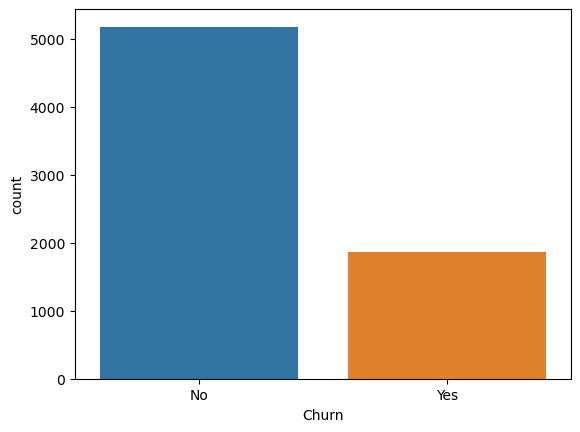

In [21]:
#Identifying the churn counts for the data set

df['Churn'].value_counts() #Results Imply that 1,869 customers churned

sns.countplot(data=df, x='Churn')


In [14]:
numRetained = df[df.Churn == 'No'].shape[0]
numChurned = df[df.Churn == 'Yes'].shape[0]

# print the percentage of customers that stayed
print(round(numRetained/(numRetained + numChurned) * 100,2),'% of customers stayed in the company')
# peint the percentage of customers that left
print(round(numChurned/(numRetained + numChurned) * 100,2), '% of customers left with the company')

73.46 % of customers stayed in the company
26.54 % of customers left with the company


<Axes: xlabel='gender', ylabel='count'>

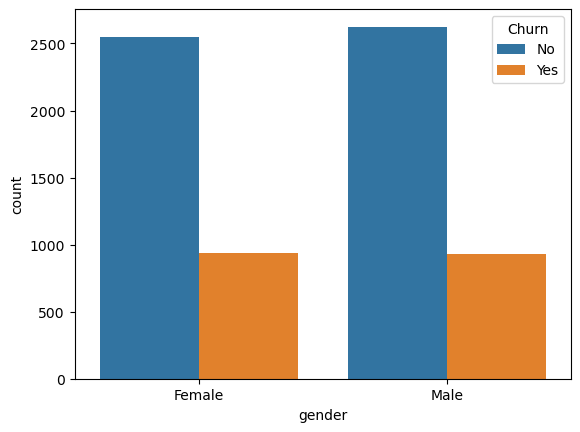

In [22]:
#To identify patterns with visualizations of various attributes
#1. Gender
sns.countplot(data=df, x ='gender', hue='Churn') #There is no significant correlation in the chart.

<Axes: xlabel='InternetService', ylabel='count'>

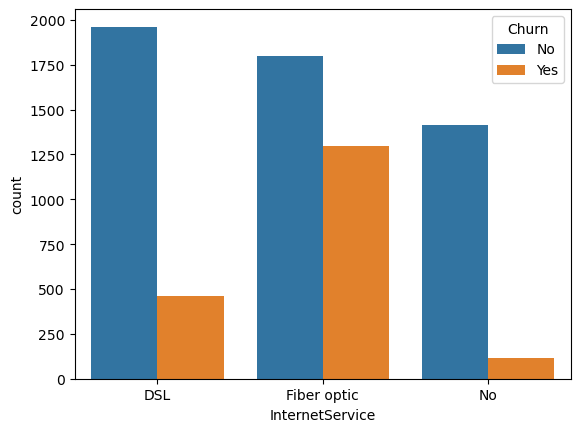

In [23]:
#2. Using the internet service provide
sns.countplot(x='InternetService', hue='Churn', data=df) #It appears the churn rate for Fiber optic is higher when compared to other services

array([<Axes: title={'center': 'tenure'}>,
       <Axes: title={'center': 'MonthlyCharges'}>], dtype=object)

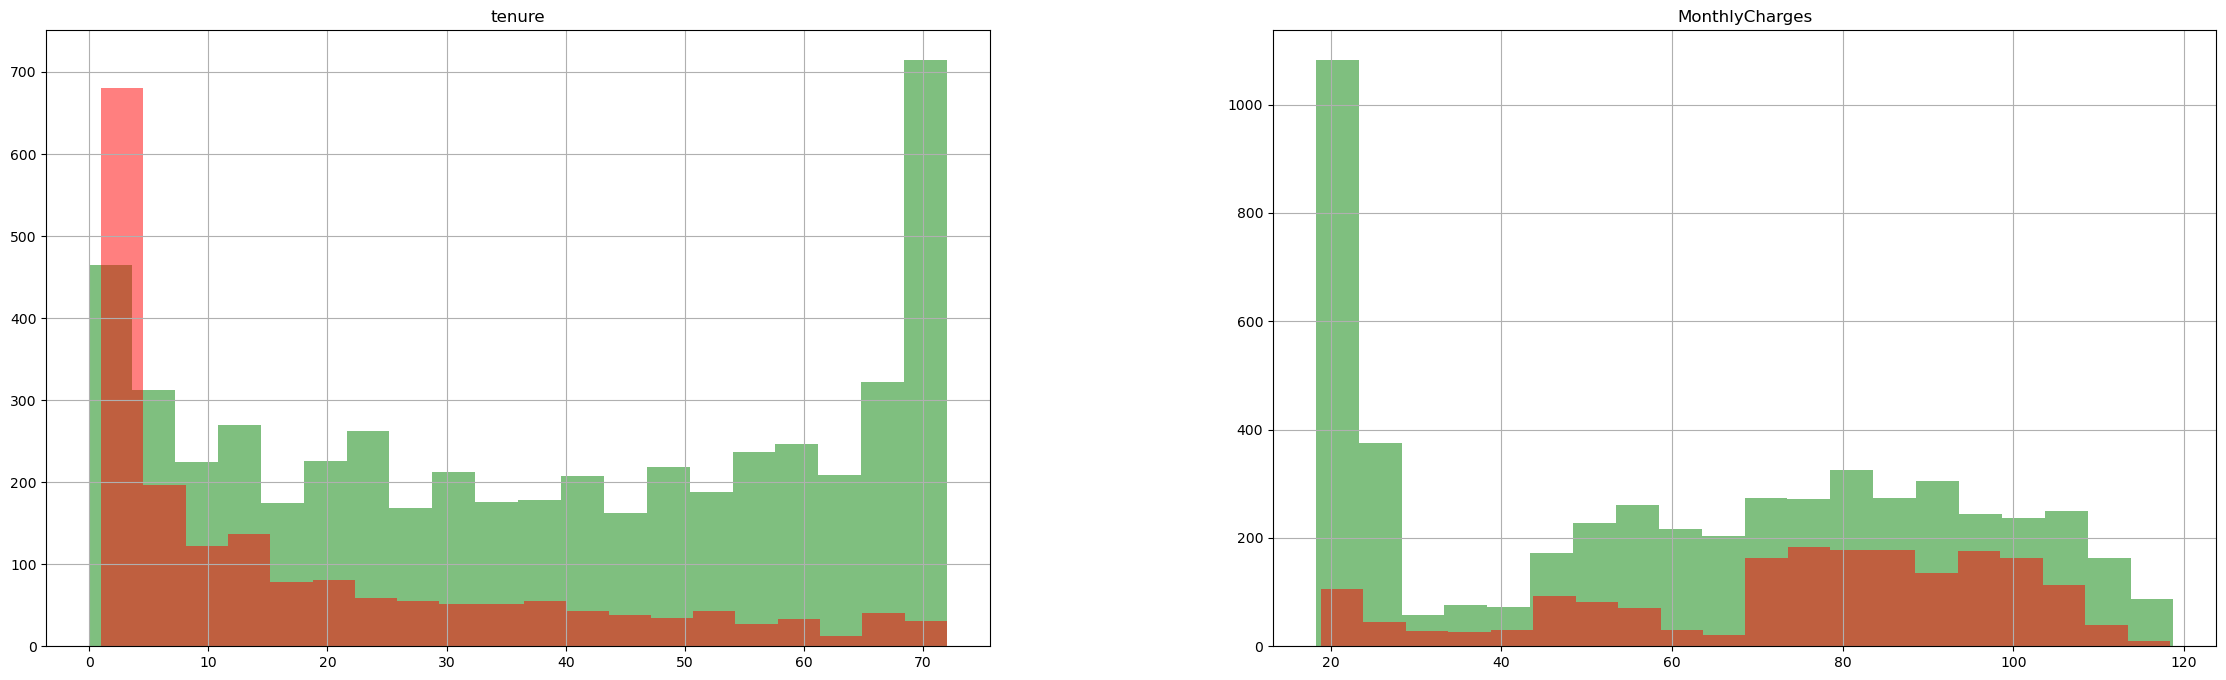

In [25]:
#Visualizing the tenure and monthly charges

numericFeatures = ['tenure', 'MonthlyCharges']
fig, ax = plt.subplots(1,2, figsize=(28, 8))
df[df.Churn == "No"][numericFeatures].hist(bins=20, color='green', alpha=0.5, ax=ax)
df[df.Churn == "Yes"][numericFeatures].hist(bins=20, color='red', alpha=0.5, ax=ax)

In [26]:
cleanDF = df.drop('customerID', axis=1)

In [43]:
#Converting all data to numeric to assist in analyzing and implementing the desired methods

from sklearn.preprocessing import LabelEncoder

# Assuming cleanDF is your DataFrame
for column in cleanDF.columns:
    if cleanDF[column].dtype == object:  # Check for non-numeric columns
        cleanDF[column] = LabelEncoder().fit_transform(cleanDF[column])

cleanDF = cleanDF.apply(pd.to_numeric, errors='coerce')  # Convert all columns to numeric
print(cleanDF.dtypes)


gender                int32
SeniorCitizen         int64
Partner               int32
Dependents            int32
tenure                int64
PhoneService          int32
MultipleLines         int32
InternetService       int32
OnlineSecurity        int32
OnlineBackup          int32
DeviceProtection      int32
TechSupport           int32
StreamingTV           int32
StreamingMovies       int32
Contract              int32
PaperlessBilling      int32
PaymentMethod         int32
MonthlyCharges      float64
TotalCharges          int32
Churn                 int32
dtype: object


In [44]:
cleanDF.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,0,1,0,1,0,1,0,0,2,0,0,0,0,0,1,2,29.85,2505,0
1,1,0,0,0,34,1,0,0,2,0,2,0,0,0,1,0,3,56.95,1466,0
2,1,0,0,0,2,1,0,0,2,2,0,0,0,0,0,1,3,53.85,157,1
3,1,0,0,0,45,0,1,0,2,0,2,2,0,0,1,0,0,42.30,1400,0
4,0,0,0,0,2,1,0,1,0,0,0,0,0,0,0,1,2,70.70,925,1


In [45]:
#Now we scale the data
x = cleanDF.drop('Churn', axis=1)
y = cleanDF['Churn']
x = StandardScaler().fit_transform(x)

In [46]:
#Spliting the data into training sets
xtrain, xtest, ytrain, ytest = train_test_split(x,y, test_size=0.2, random_state=42)

In [49]:
#Using a logistic model
model = LogisticRegression()
# Train the model
model.fit(xtrain, ytrain)

LogisticRegression()

In [50]:
predictions = model.predict(xtest)

# print the predictions
print(predictions)

[1 0 0 ... 0 0 0]


In [51]:
print(classification_report(ytest, predictions))

              precision    recall  f1-score   support

           0       0.85      0.91      0.88      1036
           1       0.69      0.56      0.62       373

    accuracy                           0.82      1409
   macro avg       0.77      0.74      0.75      1409
weighted avg       0.81      0.82      0.81      1409



# CONCLUSION


The conducted analysis aimed to predict customer churn using a logistic regression model, where '0' denotes customers unlikely to churn (no churn), while '1' represents customers likely to churn (churn). The model exhibited an overall accuracy of 82%, indicating that it correctly predicted the churn status in 82% of instances. Precision metrics revealed that out of the instances predicted as 'no churn,' the model achieved an accuracy rate of 85%, signifying the precise identification of customers who are likely to remain. Conversely, for predicting 'churn,' the model's precision stood at 69%, depicting its ability to accurately predict customer attrition.

However, the model's performance in identifying actual instances of 'churn' showed a slightly lower recall rate of 56%, indicating some challenges in correctly identifying customers who are likely to leave the service. Conversely, the recall for 'no churn' instances was notably higher at 91%, suggesting a robust capability to correctly identify customers who are unlikely to churn. The F1-scores, representing a harmonic mean of precision and recall for each class, revealed scores of 88% for 'no churn' and 62% for 'churn,' respectively.

The model demonstrates strength in accurately identifying customers who are likely to stay but exhibits some limitations in correctly predicting those likely to churn. To enhance its predictive capacity for churn, potential avenues for improvement might involve the incorporation of additional relevant features or a fine-tuning of the model parameters to capture more intricate patterns related to customer churn behavior. Further refinement could aim to mitigate false negatives, ultimately improving the overall accuracy and reliability of customer churn predictions.



C:\Users\Tette\AppData\Local\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:378: FitFailedWarning: 
20 fits failed out of a total of 40.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
20 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\Tette\AppData\Local\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Tette\AppData\Local\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py", line 1162, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\Tette\AppData\Lo

              precision    recall  f1-score   support

           0       0.92      0.74      0.82      1036
           1       0.53      0.81      0.64       373

    accuracy                           0.76      1409
   macro avg       0.72      0.77      0.73      1409
weighted avg       0.81      0.76      0.77      1409

